In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

2.9.1


In [51]:
# downloading mnist dataset (70.000 pics different types of clothes)
fashion_mnist = tf.keras.datasets.fashion_mnist

# splitting dataset to train and test parts (60.000 for training model & 10.000 for testing model)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

### Each label has int type 0-9, where:
* 0 - Tshirt
* 1 - Trousers
* 2 - Pullover
* 3 - Dress
* 4 - Coat
* 5 - Sandal
* 6 - Shirt
* 7 - Sneaker
* 8 - Bag
* 9 - Ankle boot

In [52]:
# names for future convenience
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [53]:
# size of train images (28 x 28 px)
train_images.shape

(60000, 28, 28)

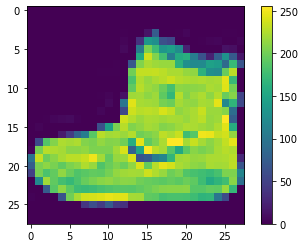

In [54]:
# image example
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [55]:
# scaling picture values from 0 to 1
train_images = train_images / 255.0

test_images = test_images / 255.0

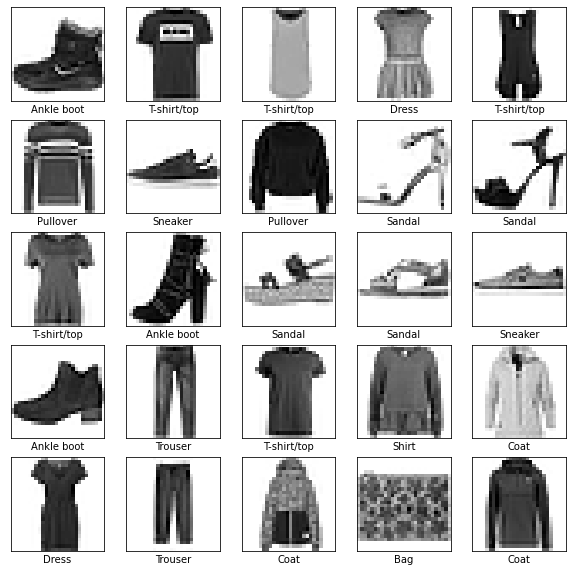

In [56]:
# checking images format to ensure that data is valid
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

# To build neural model we need to setup layers and then compile it

Major part of training consists of union simple layers (tf.keras.layers.Dense)

In [57]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # makes one-dimensional array from two-dimensional (28x28=784)
    tf.keras.layers.Dense(128, activation='relu'),  # layer with 128 neurons (nodes)
    tf.keras.layers.Dense(10)  # return logits (https://developers.google.com/machine-learning/glossary?hl=ru#logits) array with length of 10
])

# Before model is being ready for learning, it is need for a few more settings, which are going to be added during compilation

* ### **Loss function** - This measures how accurate the model is during training
* ### **Optimizer** - This is how the model is updated based on the data it sees and its loss function
* ### **Metrics** - Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified



In [58]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
* ### Feed the training data to the model. In this example, the training data is in the **train_images** and **train_labels arrays**
* ### The model learns to associate images and labels
* ### You ask the model to make predictions about a test set—in this example, the test_images array
* ### Verify that the predictions match the labels from the test_labels array

In [59]:
model.fit(train_images, train_labels, epochs=10)  # fits model to provided data (10 epochs means 10 times model goes through dataset)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4975 - accuracy: 0.8254
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3770 - accuracy: 0.8633
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3393 - accuracy: 0.8755
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3164 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2967 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2839 - accuracy: 0.8947
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2710 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2594 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2512 - accuracy: 0.9062
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.242

In [60]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)  # loss and accuracy of model. verbose is responsible for the way info is showed

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3578 - accuracy: 0.8753

Test accuracy: 0.8752999901771545


In [61]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])  # attach a softmax (https://developers.google.com/machine-learning/glossary?hl=ru#softmax) layer to convert the model's linear outputs—logits—to probabilities

In [62]:
predictions = probability_model.predict(test_images)  # predicted label for each image

313/313 [==============================] - 0s 1ms/step


In [63]:
predictions  # each number means a type of clothes

array([[1.06597793e-10, 1.04908764e-13, 2.10106984e-11, ...,
        1.38722034e-02, 5.20405274e-09, 9.85706091e-01],
       [5.57297653e-06, 7.87749315e-14, 9.90376890e-01, ...,
        1.88403305e-17, 1.41810647e-10, 7.33234071e-15],
       [2.14937003e-07, 9.99999642e-01, 9.75462679e-12, ...,
        4.44377220e-24, 1.32766295e-15, 2.07733279e-18],
       ...,
       [5.02336479e-05, 1.26550423e-10, 1.14153991e-05, ...,
        5.40309204e-12, 9.99736965e-01, 4.75562081e-13],
       [1.02896354e-06, 9.99711215e-01, 5.78469139e-09, ...,
        7.89561603e-16, 1.81791526e-10, 2.61125038e-10],
       [7.46563273e-06, 2.92760527e-09, 3.55741093e-07, ...,
        2.20011268e-03, 9.07208188e-04, 9.12961150e-06]], dtype=float32)

In [64]:
np.argmax(predictions[0])

9

In [65]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

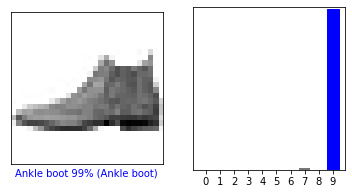

In [66]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

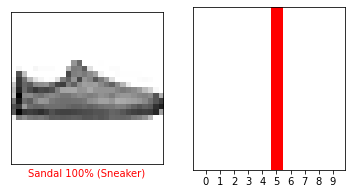

In [67]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions

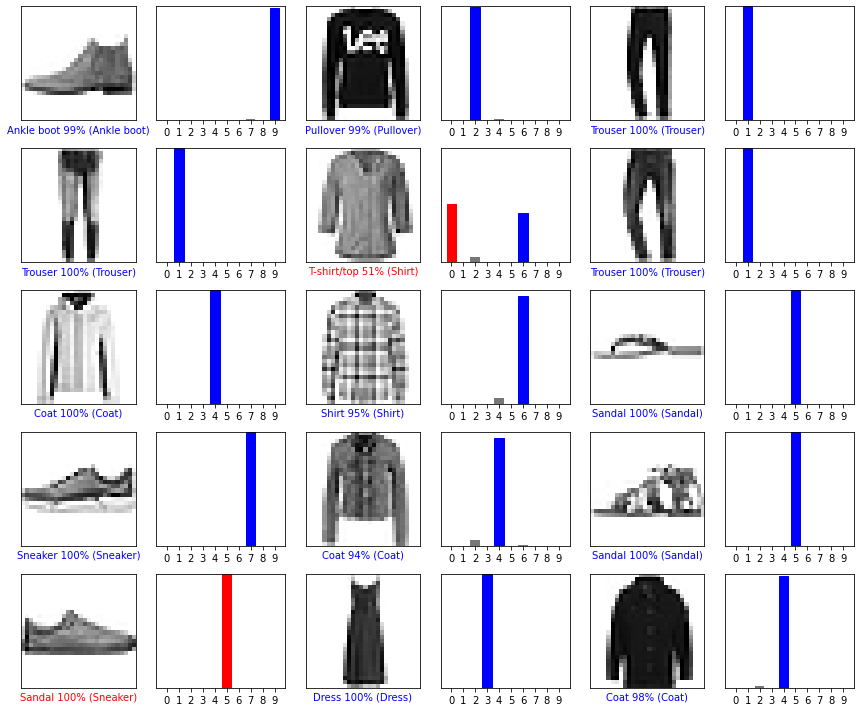

In [68]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

Finally, let's use model to predict one image

In [69]:
# grab an image from the test dataset

img = test_images[1]

print(img.shape)

(28, 28)


In [70]:
# add the image to a batch where it's the only member
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [71]:
predictions_single = probability_model.predict(img)  # predict right label for this image

print(predictions_single)

1/1 [==============================] - 0s 154ms/step
[[5.5729606e-06 7.8774484e-14 9.9037689e-01 1.2497307e-14 9.4552096e-03
  3.4453072e-12 1.6235464e-04 1.8840187e-17 1.4181012e-10 7.3323407e-15]]


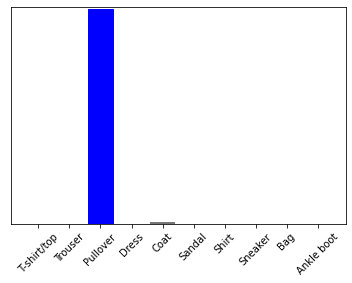

In [72]:
# plot to show prediction
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()